In [41]:
from random import randint
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler


# Dataset for Binary Classification

This dataset was created to build a binary classification model for predicting the likelihood of individuals experiencing side effects due to a certain treatment. The dataset is synthetically generated for educational purposes.

## Dataset Description

- **Data Type**: Synthetically generated
- **Problem Type**: Binary Classification
- **Classes**: Side Effect (1), No Side Effect (0)

## Features

The dataset contains one feature:

- **Age**: The age of individuals

## Labels

- **Side Effect (1)**: Individuals who experienced side effects.
- **No Side Effect (0)**: Individuals who did not experience side effects.

## Data Split

- Training Data: 50% younger individuals with side effects, 50% older individuals without side effects, and 95% younger and older individuals with no side effects.
- Testing Data: Custom data for prediction.

The goal is to train a model to predict whether an individual is likely to experience side effects based on their age.

## Sample Data

Here is a sample of the data:

| Age | Label |
|-----|-------|
| 30  |   0   |
| 54  |   1   |
| 100 |   0   |
| ... |  ...  |

## Data Scaling

The data was scaled to a range of [0, 1] to ensure that different features are on a similar scale.

The model used for classification is a neural network with multiple dense layers.

Please note that this dataset is for educational purposes and does not represent real-world data.

---



In [42]:
train_samples = []
train_label = []


In [43]:
for i in range(50):
  # 5% of younger individuals who did expereince a side effect
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_label.append(1) # 1 means side effects

  # 5% of older individuals who did not experience a side effect
  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_label.append(0) # 0 means no side effects

for i in range(1000):
  # 95% of younger individuals that did not experience any side effects
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_label.append(0)

  # 95% of older individuals that did experience side effects
  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_label.append(1)



In [44]:
# convert our list to ndim array using numpy
train_samples = np.array(train_samples)
train_label = np.array(train_label)

# shuffle the data to add randomnes
train_label, train_samples = shuffle(train_label, train_samples)

In [67]:
# check len of samples
len(train_samples)

2100

In [68]:
# check data type
train_samples.dtype

dtype('int64')

In [77]:
# convert numpy array to a Dataframe and Show the first 10 rows
# to get an idea how the data look like

df = pd.DataFrame({'Train Samples': train_samples,
              'Train Labels': train_label
              })
df.head(10)

,Train Samples,Train Labels
0,95,1
1,54,0
2,50,0
3,34,0
4,40,0
5,29,0
6,31,0
7,90,1
8,100,1
9,28,0


In [45]:
# normalizing our data,  Normalization scales the data to a specific range,
# typically between 0 and 1, to ensure that different features are on a similar
# scale. This can improve the training process
scaler = MinMaxScaler(feature_range=(0,1))


# because the train_sample is a 1D numpy array of ages
# and we convert it into 2D array where each age is its own row, the -1 is a place
# holder that tells the numpy to calculate the number of rows automatically
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))
scaled_train_samples

array([[0.94252874],
       [0.47126437],
       [0.42528736],
       ...,
       [0.91954023],
       [0.22988506],
       [0.26436782]])

# **Building a simple tf.keras Sequential Model**

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [47]:
# instantiating the sequential class
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'), # 1st hidden layer
    Dense(units=32, activation='relu'), # second hidden layer
    Dense(units=2, activation='softmax') # output layer with a softmax
])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Training our Model
splitting data into training and testing, 90% for Training and 10% for Testing to detect if our model is overfitting or not

In [49]:
from keras.api._v2.keras import metrics
#compile our model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [50]:
from re import VERBOSE
# Fitting the model with our data and splitting train and test data
model.fit(x=scaled_train_samples,
          y=train_label,
          validation_split=0.1,
          batch_size=10,
          epochs=30,
          shuffle=True,
          verbose=2
          )

Epoch 1/30
189/189 - 1s - loss: 0.7185 - accuracy: 0.4651 - val_loss: 0.6979 - val_accuracy: 0.2714 - 1s/epoch - 7ms/step
Epoch 2/30
189/189 - 1s - loss: 0.6787 - accuracy: 0.5820 - val_loss: 0.6585 - val_accuracy: 0.6762 - 560ms/epoch - 3ms/step
Epoch 3/30
189/189 - 1s - loss: 0.6392 - accuracy: 0.7095 - val_loss: 0.6128 - val_accuracy: 0.7810 - 503ms/epoch - 3ms/step
Epoch 4/30
189/189 - 1s - loss: 0.6016 - accuracy: 0.7772 - val_loss: 0.5815 - val_accuracy: 0.8048 - 542ms/epoch - 3ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5724 - accuracy: 0.7989 - val_loss: 0.5516 - val_accuracy: 0.8238 - 484ms/epoch - 3ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5433 - accuracy: 0.8201 - val_loss: 0.5214 - val_accuracy: 0.8238 - 486ms/epoch - 3ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5147 - accuracy: 0.8344 - val_loss: 0.4944 - val_accuracy: 0.8381 - 467ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4892 - accuracy: 0.8545 - val_loss: 0.4691 - val_accuracy: 0.8524 - 334ms/epoch - 2ms/step
Epo

In [51]:
print("completed")

completed


# **Making Predictions on new Data**

In [52]:
test_samples = []
test_labels = []
# Create new data (scaled in the same way as the training data)
for i in range(10):
  # simulate 5% from 13 to 65 years that had  side effects
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(1)

  # simulate 5% of older with no side effects
  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(0)

#simulate the 95% of younger with no side effect
for i in range(200):
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # 95% of older individual that had a side effect
  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(1)


# convert new data to numpy array
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

# shuffle data to remove any linearity
#test_samples, test_labels = shuffle(test_samples, test_labels)

test_labels, test_samples = shuffle(test_labels, test_samples)

# scale and transform our data
scaller = MinMaxScaler(feature_range=(0, 1))

scaled_test_data = scaller.fit_transform(test_samples.reshape(-1, 1))

print("New Data:", scaled_test_data[:10])
print("\n")

# Make predictions
predictions = model.predict(x=scaled_test_data, batch_size=10, verbose=0)

print("Raw Prediction: \n", predictions[:10], "\n")

# The predictions will be in the form of probabilities for each class
# In your case, it's binary classification (side effect or no side effect), so you'll get two probabilities for each input
# You can interpret the results based on the threshold (e.g., if probability > 0.5, classify as side effect)

# If you want to get the class label directly, you can use argmax
class_labels = np.argmax(predictions, axis=1)

# class_labels will contain the predicted labels (0 or 1) for your new data
#print(class_labels)
data = pd.DataFrame({'Test Samples': test_samples,
                     'Main Labels': test_labels,
                     'Predicted Labels': class_labels
                     })
data


New Data: [[0.66666667]
 [0.09195402]
 [0.49425287]
 [0.57471264]
 [0.35632184]
 [0.34482759]
 [0.74712644]
 [0.20689655]
 [0.95402299]
 [0.04597701]]


Raw Prediction: 
 [[0.27213094 0.7278691 ]
 [0.96433866 0.03566129]
 [0.6919419  0.30805805]
 [0.49311447 0.5068855 ]
 [0.9041018  0.0958982 ]
 [0.9139771  0.08602294]
 [0.13936245 0.86063766]
 [0.9656294  0.0343705 ]
 [0.03499871 0.96500134]
 [0.96329653 0.03670345]] 



,Test Samples,Main Labels,Predicted Labels
0,71,0,1
1,21,0,0
2,56,0,0
3,63,0,1
4,44,0,0
...,...,...,...
415,18,0,0
416,66,1,1
417,39,0,0
418,17,0,0


# Evaluating Models perfoemance with Confusion Matrix

In [53]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [54]:
cm = confusion_matrix(y_true=test_labels, y_pred=class_labels)

In [65]:
from matplotlib.axis import Tick
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues
                         ):

  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True
  """

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion matrix, without normalization
[[190  20]
 [ 10 200]]


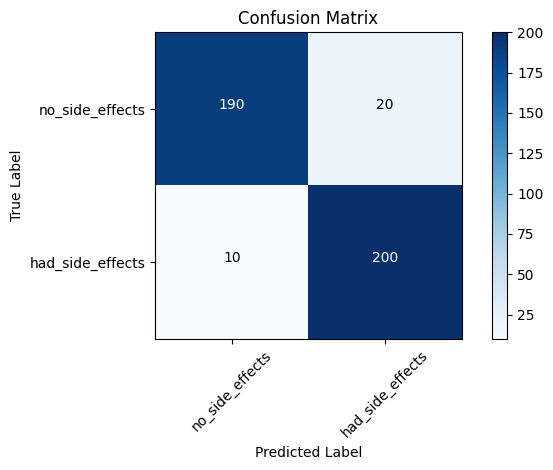

In [66]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')